In [1]:
from beagle.datasources import SysmonEVTX
from beagle.backends import NetworkX
import json
import glob
import networkx as nx
from tqdm import tqdm
import numpy as np
from karateclub import Graph2Vec, GL2Vec, FeatherGraph
import nodevectors


KeyboardInterrupt: 

In [2]:
lateral_mov_path = glob.glob("data/evtx_sample/lateral_movement/*")
latmov_graphs = []
for filepath in tqdm(lateral_mov_path):
    graph = SysmonEVTX(filepath).to_graph()
    if len(graph.nodes()) > 10:
        latmov_graphs.append(graph)
print(len(latmov_graphs))

100%|██████████| 47/47 [00:12<00:00,  3.63it/s]

12


In [3]:
credacc_path = glob.glob("data/evtx_sample/credential_access/*")
credacc_graphs = []
for filepath in tqdm(credacc_path):
    graph = SysmonEVTX(filepath).to_graph()
    if len(graph.nodes()) > 10:
        credacc_graphs.append(graph)

print(len(credacc_graphs))

100%|██████████| 38/38 [03:29<00:00,  5.52s/it]

5


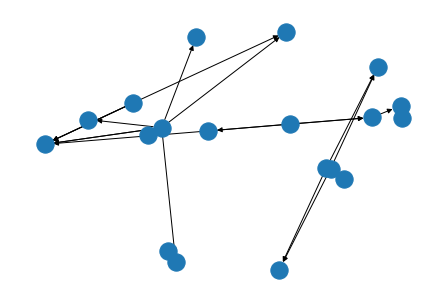

In [9]:
nx.draw(latmov_graphs[0])


In [4]:
latmov_graphswww = [nx.convert_node_labels_to_integers(x) for x in latmov_graphs]
credacc_graphswww = [nx.convert_node_labels_to_integers(x) for x in credacc_graphs]


In [5]:
latmov_graphs_tup = [(x, 0) for x in latmov_graphswww]
credacc_graphs_tup = [(x, 1) for x in credacc_graphswww]
graphlistss = latmov_graphs_tup + credacc_graphs_tup


In [60]:
def getembedding(graphlist, dim=16):
    model = Graph2Vec(dimensions=dim, attributed=True)
    model.fit(graphlist)
    embedlist = model.get_embedding()

    return embedlist


In [61]:

def savegrapfile(datalist, filename):
    collect_bag = []
    get_unique_class = np.tile(np.unique([y for x, y in datalist]), 4)
    #get_unique_class = [random.randint(0, 1) for _ in range(size)]
    for unique_y in get_unique_class:
        for i, (x, y) in enumerate(datalist):
            if y == unique_y:
                collect_bag.append((x, y))
                datalist.pop(i)
                break

    X_list = getembedding([x for x, y in collect_bag])

    y_list = [y for x, y in collect_bag]
    graph_list = [x for x, y in collect_bag]

    outlist = [(x, y, graph_list)
                for x, y, graph_list in zip(X_list, y_list, graph_list)]
    with open('data\\'+filename+'.npy', 'wb') as f:
            np.save(f, outlist)


In [62]:
[y for x, y in graphlistss]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [63]:
savegrapfile(graphlistss, "EVTX")


KeyError: 1